# AllLife Bank Customer Segmentation

# 1. <a id = "link1"></a> Problem Statement

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

 In this notebook, I am using the K-means and Hierarchical clustering techniques to segment customers based on their spending patterns. The dataset contains various independent variables such as `Average credit limit`, `Total calls made`, `Total visits to bank`etc. that are being analyzed. The data will be trained by these models and perform cluster profiling and provide insights

## Objective:

**The dataset aims to answer the following key questions:**

To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.


## Data Dictionary:

* Sl_No: Primary key of the records
* Customer Key: Customer identification number
* Average Credit Limit: Average credit limit of each customer for all credit cards
* Total credit cards: Total number of credit cards possessed by the customer
* Total visits bank: Total number of visits that customer made (yearly) personally to the bank
* Total visits online: Total number of visits or online logins made by the customer (yearly)
* Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)


## Index


- <a href = #link1># Problem Statement </a>


- <a href = #link2># Loading libraries </a>


- <a href = #link3># Loading and exploring the data </a> 


- <a href = #link4># Data Exploratory Analysis </a>


- <a href = #link5># Data Pre-processing </a> 


- <a href = #link6># K-means Clustering</a>


- <a href = #link7># Hierarchical Clustering </a>


- <a href = #link8># Cluster Comparison & Profiling </a>


- <a href = #link9># Business Recommendations </a>

# 2. <a id = "link2"></a>Loading libraries

In [163]:
# this will help in making the Python code more structured automatically (good coding practice)
%reload_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 3. <a id = "link3"></a>Loading and exploring the data
In this section the goal is to load the data into dataframe and check its basic properties. This will include the dimension, column types and names, and missingness counts.

In [164]:
bank = pd.read_excel("Credit Card Customer Data.xlsx", sheet_name="Sheet1")
df = (
    bank.copy()
)  # copying to a another dataframe to keep the original dataframe intact to refer back

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [165]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [166]:
df.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The data include various customers of the bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).From the random 5 head and tail rows, I don't see any missing values but needs futher investigation to check the data quality.

In order to keep the column name formats consistent, we need to fix the `Customer Key` column which has a space in between

In [167]:
df = df.rename(columns={"Customer Key": "Customer_Key"})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [168]:
df.shape
print("Dataset contains", df.shape[0], "rows of customer information")

Dataset contains 660 rows of customer information


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer_Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Dataset contains all Int types and It does not seem like any data type conversion necessary

In [170]:
pd.DataFrame(
    data={"% of Missing Values": round(df.isna().sum() / df.isna().count() * 100, 2)}
)

,% of Missing Values
Sl_No,0.0
Customer_Key,0.0
Avg_Credit_Limit,0.0
Total_Credit_Cards,0.0
Total_visits_bank,0.0
Total_visits_online,0.0
Total_calls_made,0.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It appears that there are no missing values in the dataset. However need to investigate further to see the column unique values to see if any imputation needed.

In [171]:
df.apply(lambda x: len(x.unique()))

Sl_No                  660
Customer_Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

There are 660 rows in the dataset but total customer keys are 655. It looks like 5 customers are duplicated

In [172]:
duplicate = df[df.duplicated("Customer_Key")]
duplicate

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

There are 5 duplicate rows in `Customer_Key`

In [173]:
df.drop_duplicates(subset="Customer_Key", keep="first", inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Removed the duplicate customer rows by keeping only the first occurence of the customer data

The `Sl_No` column does not add any interesting information. We can ignore this column for clustering.

In [174]:
df.drop("Sl_No", axis=1, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Summary of the Dataset

In [175]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Key,655.0,55058.158779,25606.965469,11265.0,33623.5,53898.0,77084.5,99843.0
Avg_Credit_Limit,655.0,34242.748092,37240.896986,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,655.0,4.691603,2.169325,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,655.0,2.401527,1.633648,0.0,1.0,2.0,4.0,5.0
Total_visits_online,655.0,2.606107,2.940380,0.0,1.0,2.0,4.0,15.0
Total_calls_made,655.0,3.601527,2.867352,0.0,1.0,3.0,5.0,10.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* `Avg_credit_limit`:  Mean and median credit limit of customers vary significantly which indicate there is skewness in distribution of credit limit.
* `Total_credit_cards`: Avg number of credit cards possessed by customers is 5 and 75% of customers possessed 6 cards or more.
* `Total_visits_bank` : Average visits to the bank is roughly 2 and the maximum is 5 visits among all customers.
* `Total_visits_online` : Total online visits vary from 0 to 15, with average visits at roughly 2. 75% customers made 4 visits or per year. But remaining 25% customers made 13 plus visits online 
* `Total_calls_made` : customers made between 0 and 10 phone calls

# 4. <a id = "link4"></a>Data Exploratory Analysis

In [176]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

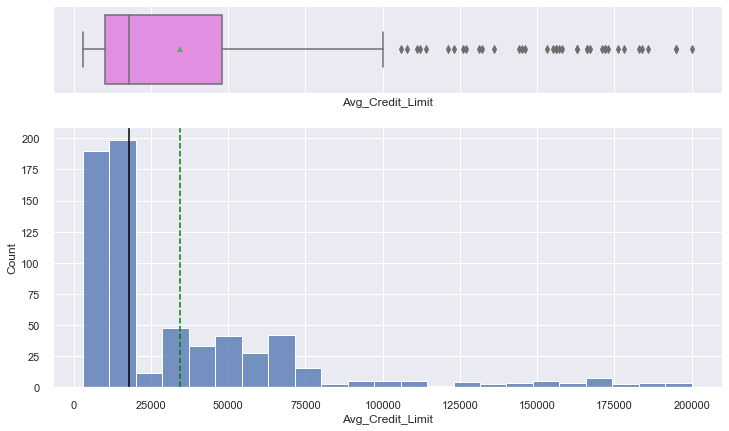

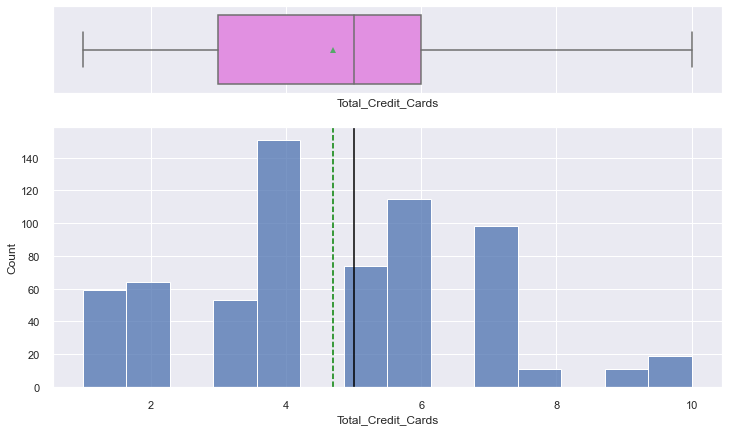

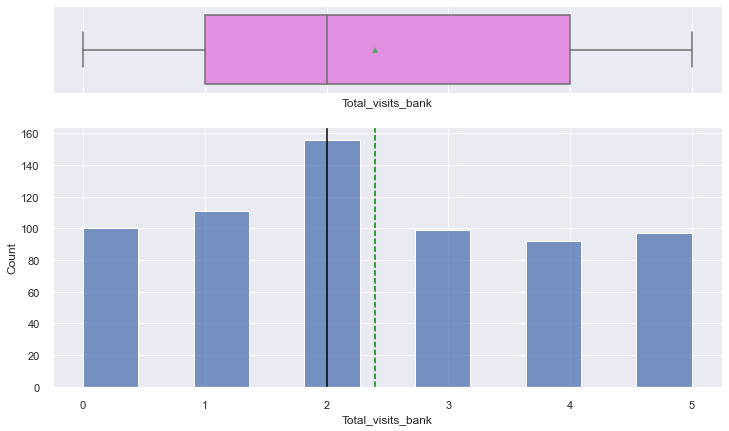

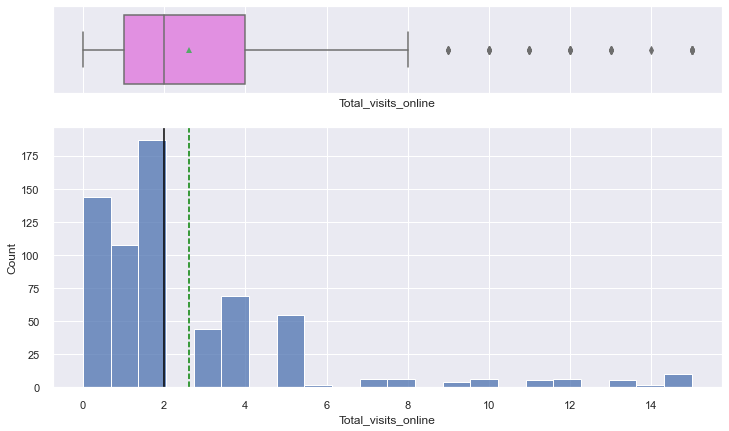

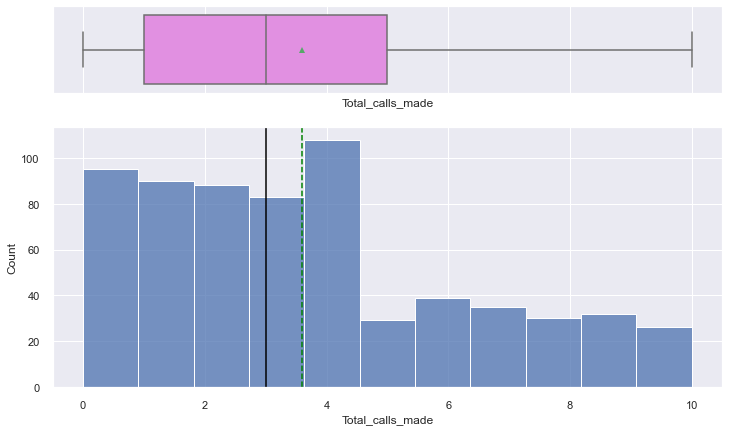

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [177]:
# selecting numerical columns
num_col = df.drop(["Customer_Key"], axis=1, inplace=True)
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item)

**Observations**

- Avg credit limit have right-skewed distributions with upper outliers, which indicates these customers possibly are high income earners with higher credit limits.
- The maximum calls made is 10.
- Total visits online is right skewed with fewer customers making 3 or more visits
- There is a normal distribution with number of credit cards. Avg number of cards held by customers is around 5
- Total visits to the bank have no outliers. There are more customers who made 2 visits or more.

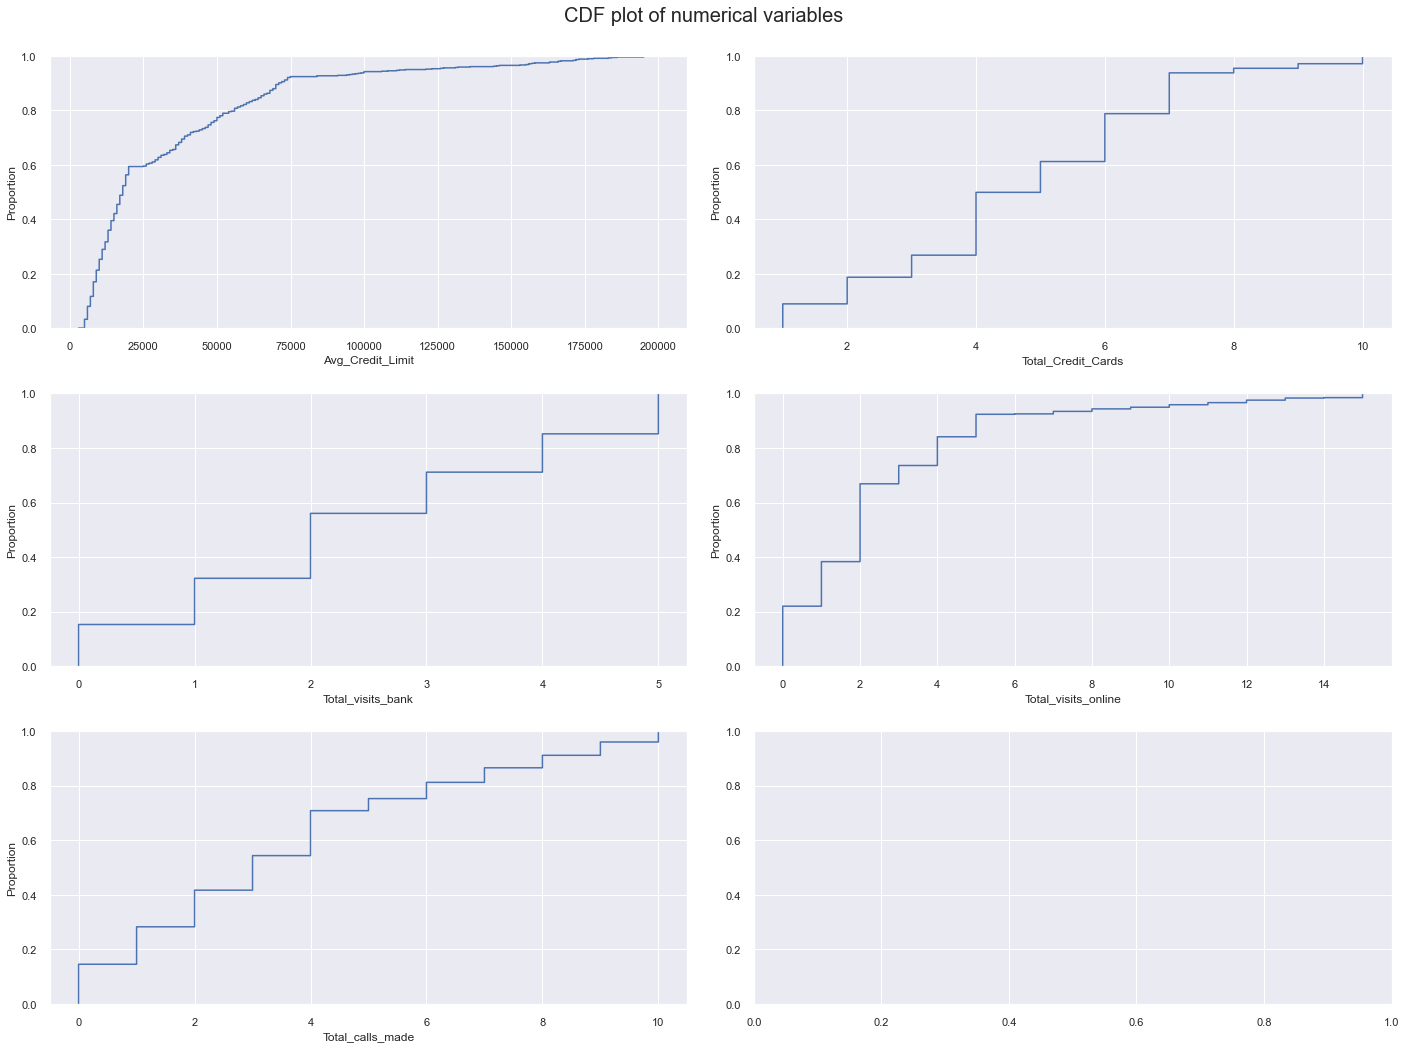

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [178]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

- 90% customers have avg credit limit less than 75000
- 80% customers have less than 4 visits online
- 70% customers have less than 4 calls made
- 60% customers have 3 visits to the bank
- 60% customers have 6 credit cards or less

### 4.1 Univariate Analysis

In [179]:
# Function to create bar plots that indicate percentage for each category.


def perc_on_bar(z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in the hue parameter
    """

    total = len(df[z])  # length of the column
    plt.figure(figsize=(15, 5))
    ax = sns.countplot(df[z], palette="Paired")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

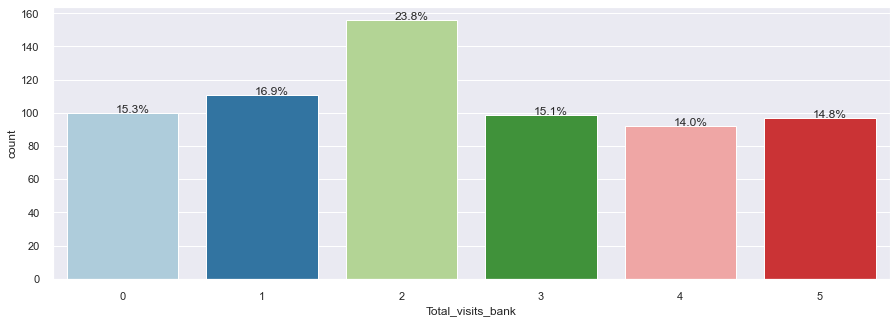

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [180]:
perc_on_bar("Total_visits_bank")

23.8% customers have made 2 visits to the bank

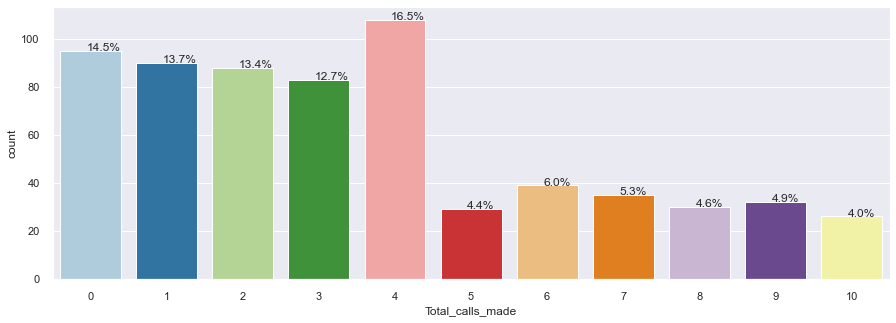

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [181]:
perc_on_bar("Total_calls_made")

16.5% customers have made 4 calls and 14.5% customers did not make any calls

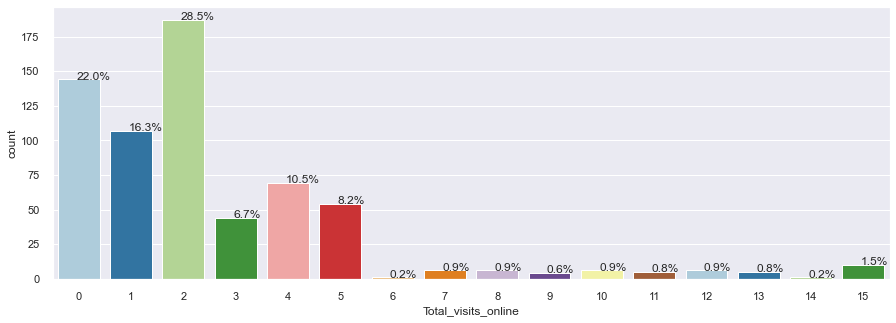

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [182]:
perc_on_bar("Total_visits_online")

28.5% customers have visited 2 times online followed by 16.3% customers made 1 call. There are majority of customer who did not visit online(22%)

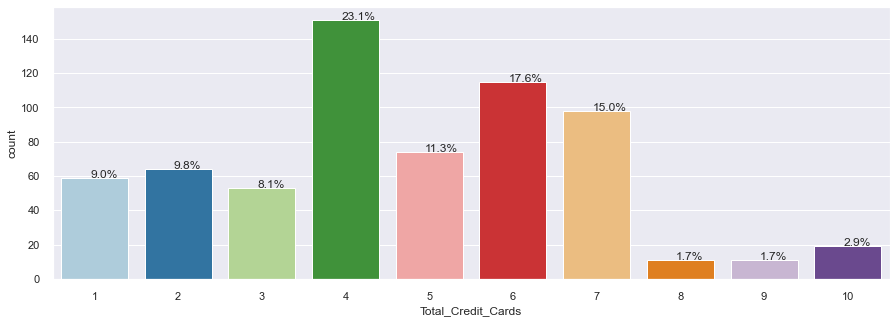

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [183]:
perc_on_bar("Total_Credit_Cards")

23.1% customers possessed 4 credit cards

<AxesSubplot:xlabel='Avg_Credit_Limit', ylabel='Density'>

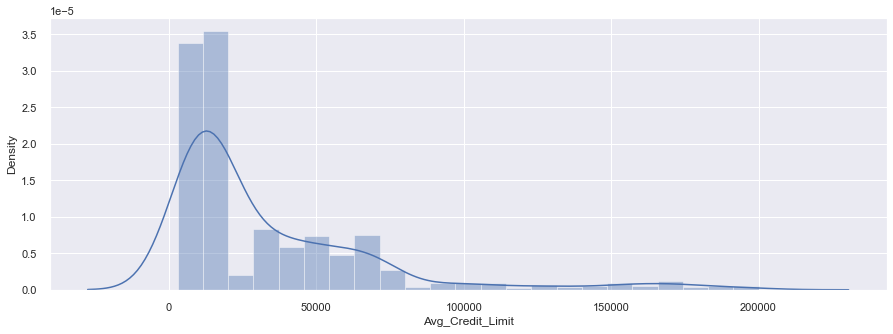

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [184]:
plt.figure(figsize=(15, 5))
sns.distplot(df["Avg_Credit_Limit"])

Majority of customers have avg credit limit less than 100000

### 4.2 Bivariate Analysis

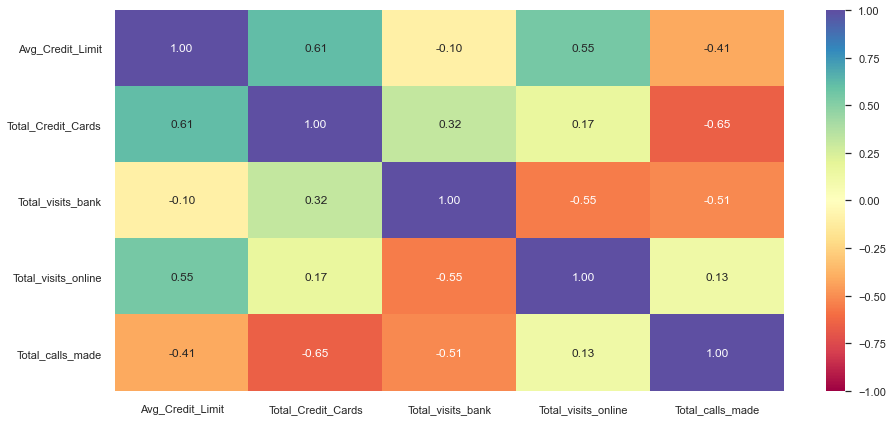

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [185]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- `Total_credit_cards` and `avg_credit_limit` are highly positively correlated, as it indicates more number of cards will give more credit limit
- `Total_visits_online` and `avg_credit_limit` are highly positively correlated as it enables customers to manage transactions online
- `Total_visits_online` and `Total_visits_bank` are negatively correlated as it is obvious if the customers are able manage the things online, bank visits are not necessary.
- `Total_visits_bank` and `total_calls_made` are negatively correlated, as online customers would need to make more phone calls as oppose to customers visiting the bank
- `Total_calls_made` and `avg_credit_limit` are also negatively correlated as it indicates customers need not make calls to increase the credit limit
- `Total_credit_cards` and `total_calls_made` are negatively correlated as it indicates customers need not make calls to request a credit limit increase or lower interest rate as they could manage with other cards

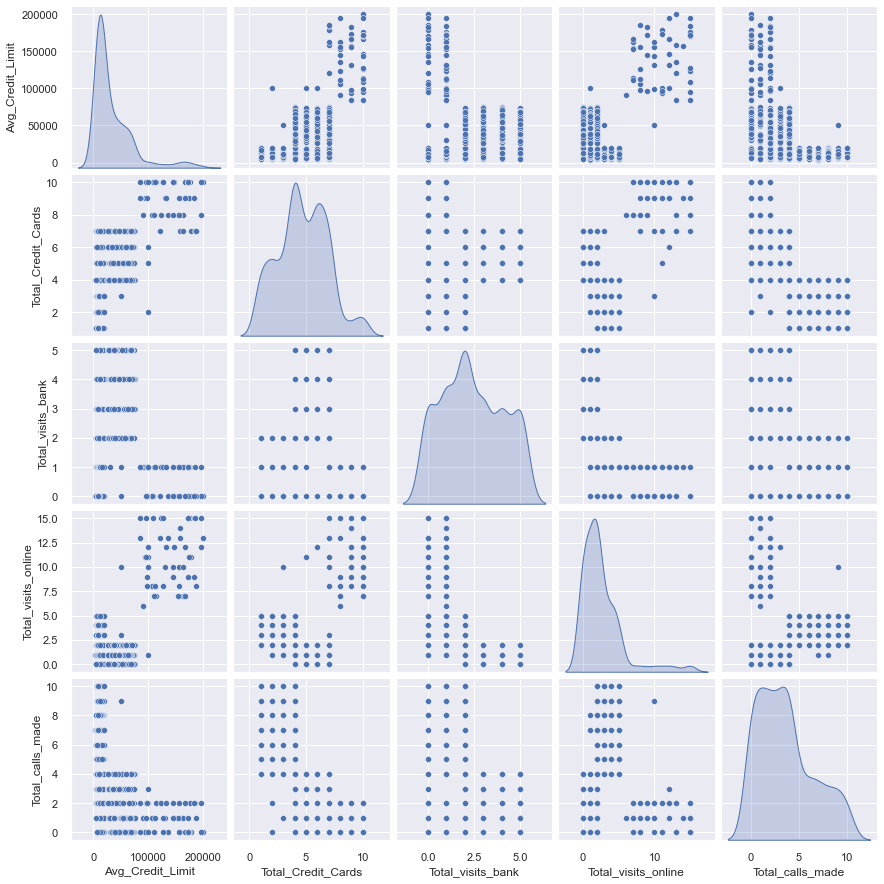

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [186]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

* Customers with higher avg credit limit of 100000 or more, made only 2 calls or less
* Customers who made 2 calls or more have made less than 5 visits online
* Customers with less than 100000 credit limit made less than 5 visits online

# 5. <a id = "link5"></a>Data Pre-processing

In [187]:
num_col

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [188]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [189]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_df1 = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 6. <a id = "link6"></a>K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.0066825567410675
Number of Clusters: 2 	Average Distortion: 1.4554607273975226
Number of Clusters: 3 	Average Distortion: 1.145871537548017
Number of Clusters: 4 	Average Distortion: 1.0467464299391422
Number of Clusters: 5 	Average Distortion: 0.9907370371249631
Number of Clusters: 6 	Average Distortion: 0.9424474527535006
Number of Clusters: 7 	Average Distortion: 0.9094145767111652
Number of Clusters: 8 	Average Distortion: 0.8897628325525295


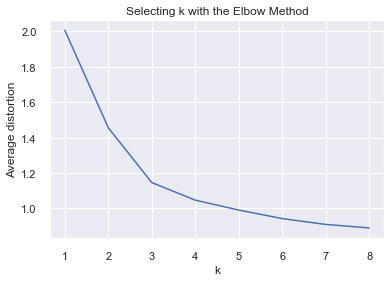

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [190]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

For the given data, we conclude that the optimal number of clusters for the data is 3 or 4

**Let's check the silhouette scores.**

For n_clusters = 2, the silhouette score is 0.4186065257549025)
For n_clusters = 3, the silhouette score is 0.5154145560843687)
For n_clusters = 4, the silhouette score is 0.3550820814050133)
For n_clusters = 5, the silhouette score is 0.3320310370687085)
For n_clusters = 6, the silhouette score is 0.25545040460205326)
For n_clusters = 7, the silhouette score is 0.24801202984332366)
For n_clusters = 8, the silhouette score is 0.22667013150439405)
For n_clusters = 9, the silhouette score is 0.21200764847364484)


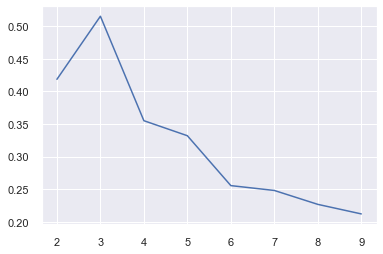

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [191]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

**Silhouette score for 4 is higher than 3. So, It confirms that 4 as value of k seems to be correct**

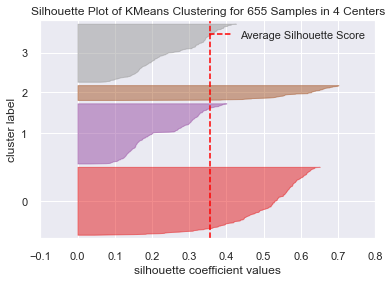

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 655 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [192]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

In [193]:
# let's take 4 as number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [194]:
# adding kmeans cluster labels to the original and scaled dataframes

km_df = df.copy()
km_df["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 7. <a id = "link7"></a>Hierarchical Clustering

In [195]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df1, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df1))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7392346514952489.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8672981179730402.
Cophenetic correlation for Euclidean distance and average linkage is 0.8978684505898265.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8923308120540114.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7396083723472703.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.851859158487362.
Cophenetic correlation for Chebyshev distance and average linkage is 0.896046402728589.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8714371082036658.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7050670931967608.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6561090581872261.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8318830598319876.
Cophenetic corr

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [196]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8978684505898265, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Let's explore different linkage methods with Euclidean distance only.**

In [197]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df1, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df1))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7392346514952489.
Cophenetic correlation for complete linkage is 0.8672981179730402.
Cophenetic correlation for average linkage is 0.8978684505898265.
Cophenetic correlation for centroid linkage is 0.894036986651765.
Cophenetic correlation for ward linkage is 0.7392392076250658.
Cophenetic correlation for weighted linkage is 0.8923308120540114.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [198]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8978684505898265, which is obtained with average linkage.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**

**Let's see the dendrograms for the different linkage methods.**

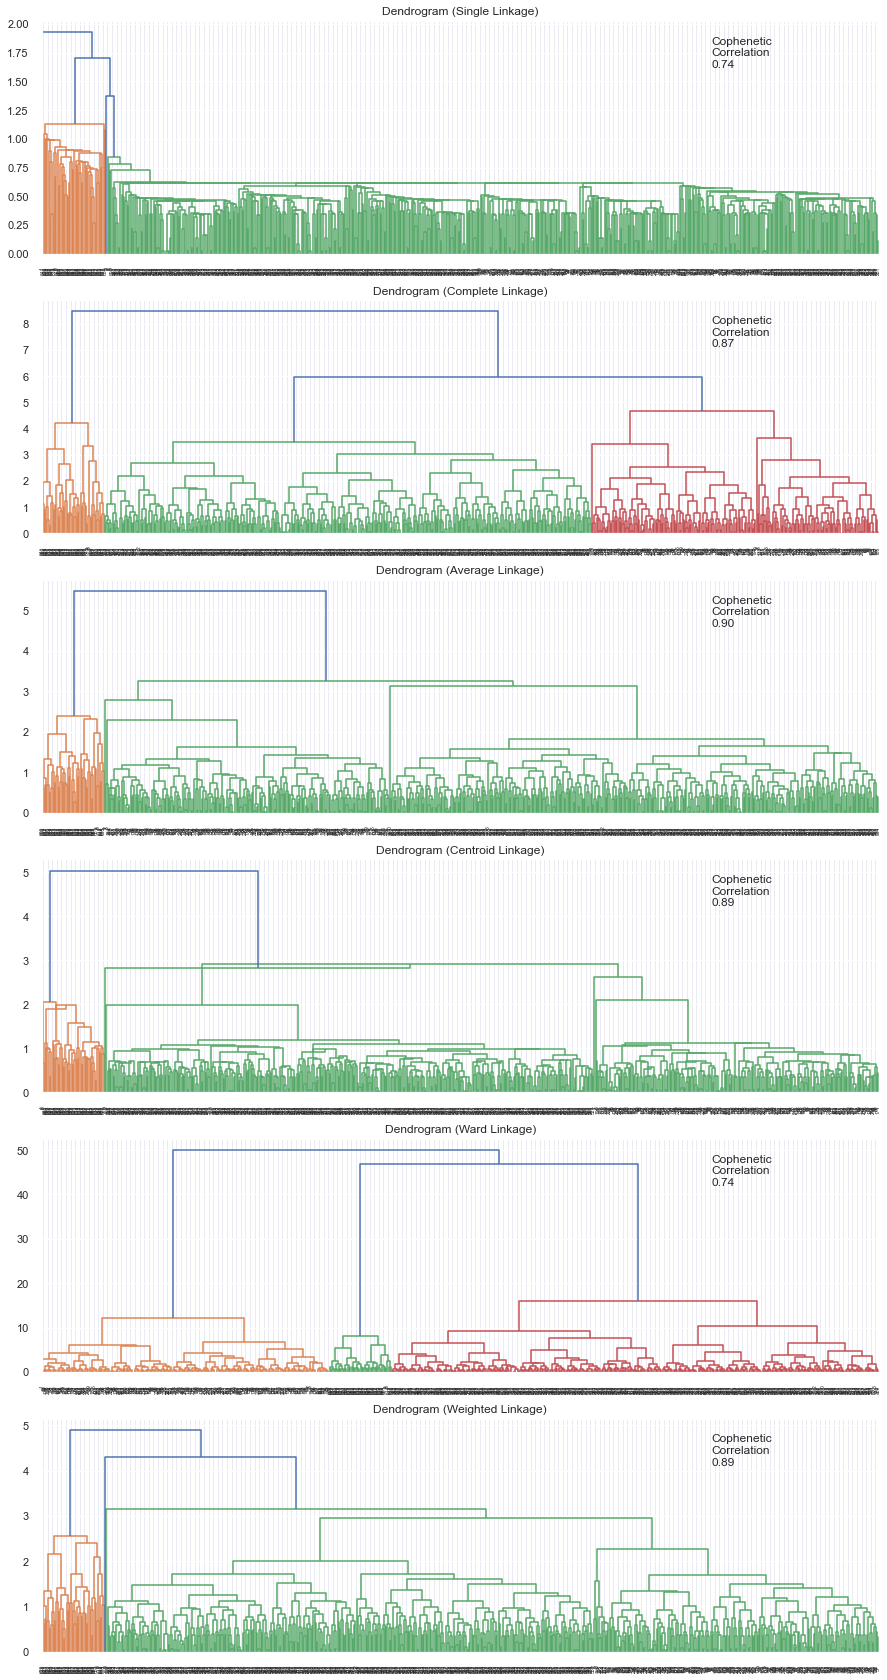

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [199]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df1, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df1))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**

- The cophenetic correlation is highest for average linkage methods.
- 3 appears to be the appropriate number of clusters from the dendrogram for average linkage.

In [151]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df1)

AgglomerativeClustering(linkage='average', n_clusters=3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 8. <a id = "link8"></a>Cluster Comparison & Profiling

### 8.1 K-Means Cluster Profile

In [200]:
cluster_profile = km_df.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [201]:
cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K_means_segments,,,,,
0,31074.074074,5.470899,4.513228,1.005291,1.936508
1,12167.420814,2.393665,0.927602,3.574661,6.923077
2,140102.040816,8.775510,0.591837,10.979592,1.102041
3,35724.489796,5.510204,2.479592,0.964286,2.086735


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [202]:
cluster_profile["count_in_each_segments"] = (
    km_df.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [203]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,
0,31074.074074,5.470899,4.513228,1.005291,1.936508,189
1,12167.420814,2.393665,0.927602,3.574661,6.923077,221
2,140102.040816,8.775510,0.591837,10.979592,1.102041,49
3,35724.489796,5.510204,2.479592,0.964286,2.086735,196


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

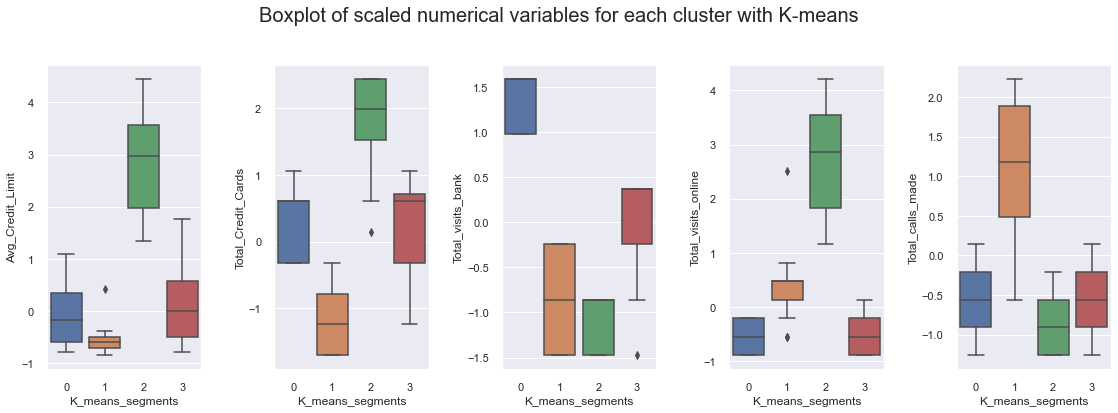

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [214]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of scaled numerical variables for each cluster with K-means", fontsize=20
)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

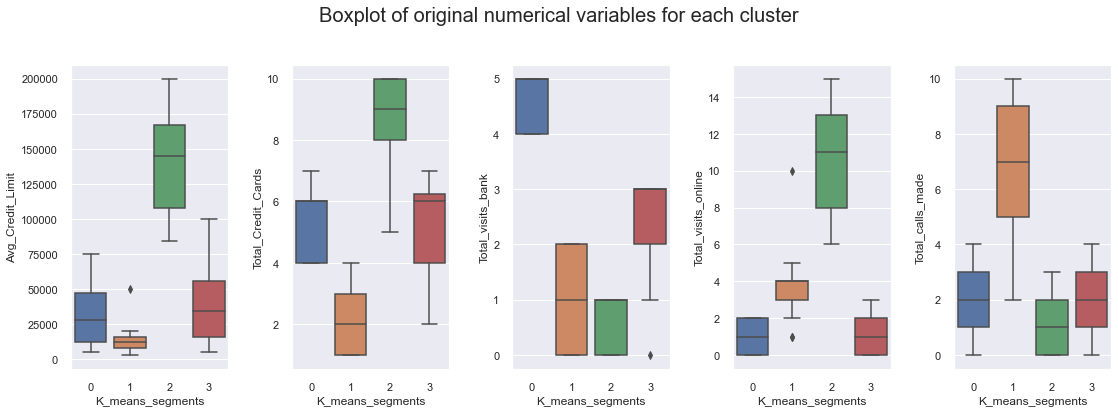

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [157]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster with K-means", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=km_df[num_col[counter]], x=km_df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

### Insights for K-means

- **Cluster 0**:
    - The average credit limit of this cluster is around 30000. It ranges from around 10000 to 49000
    - Total credit cards owned are between 4 and 6
    - This cluster customers have made the highest visits to the bank between 4 and 5 visits.
    - They made the fewest visits online, an average of 1 visit. It seems like this segment of customers prefer prefer directly visiting the bank as oppose to the online activity
    - Made average of 2 calls which is on the lower end relatively, probably because of less online activity
   
- **Cluster 1**:
    - Avg credit limit is very low for customers in this cluster, and the number of credit cards possessed is also low, average of 2
    - Total visits to the bank is also low and visits online is relatively high between 3 and 4. Seems like moderate online and bank visitors
    - Total call made is the highest among all the clusters- between 5 and 9, seems like active customers. Also since their credit limits are low, they may need to make calls to enquire about increasing the credit limits

    
- **Cluster 2**:
    - Avg credit limits are very high for this cluster of customers with average 150000, the number of credit cards possesed by the customers are also the highest, around 9 and 10, which is possibly the reason for higher credit limits
    - This cluster of customers have lower bank visits(1) and higher online visits(between 8 and 13)
    - Total calls made is the lowest amoung other cluster of customers, average 1 calls. Since their credit limits are higher the need to make calls reduces


- **Cluster 3**:
    - This cluster of customers have moderate credit limit - average of 35000
    - Total credit cards possessed by the customers are also moderate - between 4 and 6
    - Moderate visits to the bank(2 and 3), very low visits online.
    - Total calls made are also less since their online activity is less

### 8.2 Hierarchical Cluster Profile

In [204]:
subset_scaled_df1["HC_Clusters"] = HCmodel.labels_
hc_df = df.copy()
hc_df["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [205]:
cluster_profile1 = hc_df.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [206]:
cluster_profile1

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
HC_Clusters,,,,,
0,33535.248042,5.501305,3.490862,0.979112,2.010444
1,140102.040816,8.775510,0.591837,10.979592,1.102041
2,12197.309417,2.403587,0.928251,3.560538,6.883408


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [207]:
cluster_profile1["count_in_each_segments"] = (
    hc_df.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [208]:
cluster_profile1

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,33535.248042,5.501305,3.490862,0.979112,2.010444,383
1,140102.040816,8.775510,0.591837,10.979592,1.102041,49
2,12197.309417,2.403587,0.928251,3.560538,6.883408,223


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

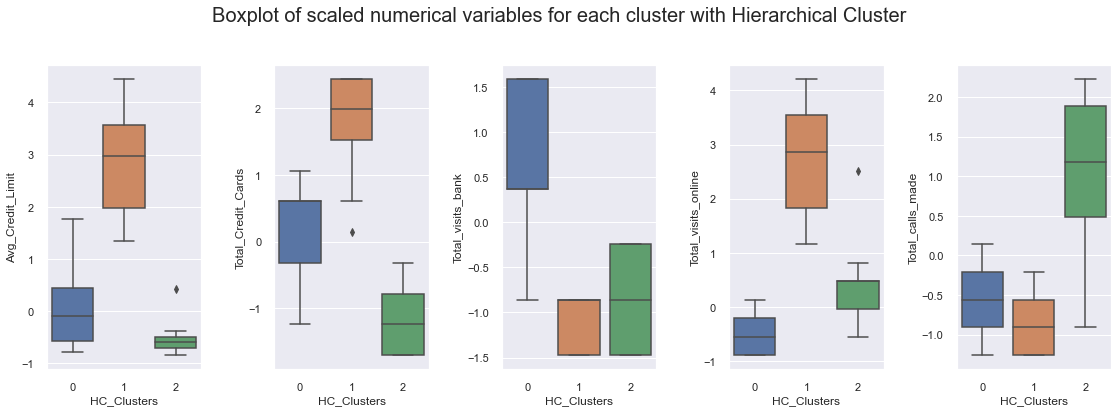

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [210]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of scaled numerical variables for each cluster with Hierarchical Cluster",
    fontsize=20,
)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df1[num_col[counter]],
        x=subset_scaled_df1["HC_Clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

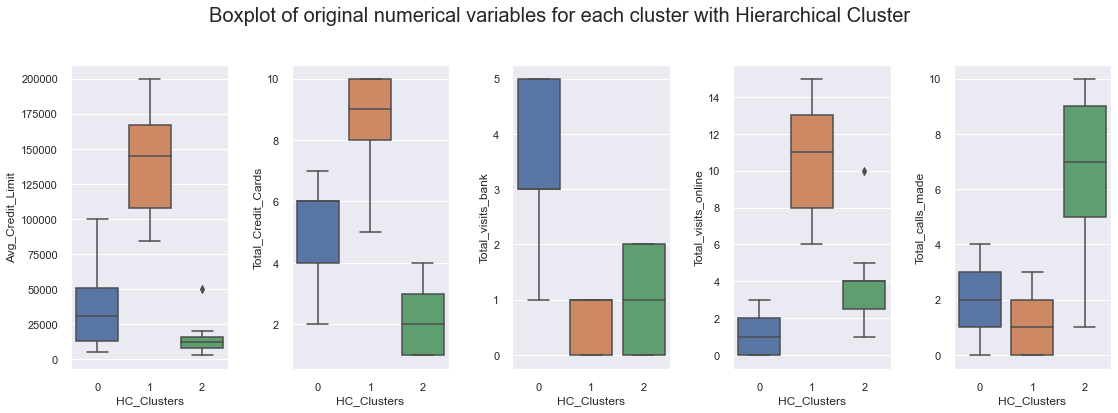

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [212]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of original numerical variables for each cluster with Hierarchical Cluster",
    fontsize=20,
)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=hc_df[num_col[counter]], x=hc_df["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

### Insights for Hierarchical Cluster

- **Cluster 0**:
    - This cluster contains less credit limit customers, average of 30000. 
    - Total credit cards possesed are moderate - between 4 and 6
    - Very high bank visits (between 3 and 5)
    - Very low online visits as a result the number of calls made are also low - average of 2
   
- **Cluster 1**:
    - This cluster customers have the highest credit limit and highest number of credit cards.
    - Very low bank visit
    - Very high online visits. But the number of calls made are very low. Possibly because the credit limit and number of credit cards are high
    
- **Cluster 2**:
    - This cluster of customers have very low credit limit and very low total credit cards(average 2)
    - Moderate online(average 1) and bank visitors(between 2 and 4)
    - Total calls made is very high - average of 7, possible because of the lower credit limit

### Comparison of Clusters

In [223]:
cluster_profile.style.highlight_max(color="lightgreen")

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,
0,31074.074074,5.470899,4.513228,1.005291,1.936508,189
1,12167.420814,2.393665,0.927602,3.574661,6.923077,221
2,140102.040816,8.775510,0.591837,10.979592,1.102041,49
3,35724.489796,5.510204,2.479592,0.964286,2.086735,196


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [224]:
cluster_profile1.style.highlight_max(color="lightgreen")

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,33535.248042,5.501305,3.490862,0.979112,2.010444,383
1,140102.040816,8.775510,0.591837,10.979592,1.102041,49
2,12197.309417,2.403587,0.928251,3.560538,6.883408,223


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Observations:

- It looks like cluster 2 in K-means is same as cluster 1 in HC_cluster.
- Cluster 1 in k-means is almost similar to cluster 2 in HC cluster

# 9. <a id = "link9"></a>Business Recommendations

Business recommendations based on K-means are as follows:
- Cluster 0 have customers with very low online visits, so focused marketing campaigns towards blog content, social media compaigns can help attract online visits. Besides, offering promotional points for online visitors can help boost online customer base.
- Cluster 1 have highest total calls made. Need to synthesize their online queries and focus on improving the services. Also, make more self-serve features in the online platform so the calls can be reduced.Cluster 1 also have lowest number of credit cards. so, offering new products and services will expand the usage and upsell existing customers
- Cluster 2 have the highest credit limits and higest number of cards. So, it is important to analyse spending behaviour and offer targetted promotions for spending on the card to generate fees
- Cluster 0 and cluster 3 have higher visits to the bank, so, offering more closer customer engagement, increasing flexibilty with transactions will help customers to choose online
- Cluster 1 and 3 have lower credit limits. 1 and 3 also happen to have high number of calls made. Possibly these customers are contacting to get their credit limits increased. So, analyzing their past transaction and offering credit limit increase will help retain existing customers.

In addition, the bank has to devise a targetted marketing campaign keeping the above segmentation in mind to retain existing customers and to attract new customers.Other strategies include as follows:
-    1. Build and maintain customer loyalty
-   2. Provide credit card retention offer such as lower fees, higher points and better perks
-   3. Successful retention strategies require actions at all levels. This includes acquisition, customer service, collections,        credit, activation and attrition.
-    4. Offer exceptional customer service to retain the existing customers so that they don't end up going to the competitors
-   5. Establish partnerships and nurture relationships by offering free newsletter with helpful tips on spending and bonus points. By doing this, the bank can build an email list to build relationships. 
-    6. Increase marketing spending and devise targetted marketing campaign to retain credit card customers 
-   7. Follow Up with existing customers and gain referrals to expand the customer base.